# 🚢 Titanic Survival Prediction with Neural Networks

In this project, we explore the Titanic dataset to understand survival patterns and build a neural network model using TensorFlow/Keras to predict passenger survival. 

### Key Steps:
- Data Cleaning & Preprocessing
- One-Hot Encoding for Categorical Variables
- Train-Test Splitting and Feature Scaling
- Building a Simple Neural Network
- Model Training, Evaluation, and Visualization


# Import Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

 # Load and Preprocess the Titanic Dataset:

In [ ]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset using seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()

# Show column names in the dataset
titanic.columns

#  Drop rows where 'age' or 'embarked' is missing
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# One-hot encode categorical columns into numerical format
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'])

# Split the dataset into features (X) and target (y)
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']


# Split the Dataset and Standardize Features:

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values to have mean = 0 and std = 1
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)


# Build, Compile, and Train the Neural Network Model:

In [ ]:
#  Define the input and output layers of the neural network
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))  # Input layer with ReLU activation
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification

# Build the sequential model
model = tf.keras.models.Sequential([
    input_layer,
    output_layer
])

#  Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#  Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10)

#  Train the model using training data and validate on test data
hist = model.fit(X_train, y_train, 
                 epochs=10, 
                 batch_size=32, 
                 verbose=1,
                 validation_data=(X_test, y_test),
                 callbacks=[early_stopping])  # Apply early stopping during training


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4615 - loss: 0.7564 - val_accuracy: 0.5804 - val_loss: 0.7084
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5990 - loss: 0.7026 - val_accuracy: 0.6014 - val_loss: 0.6611
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6656 - loss: 0.6056 - val_accuracy: 0.6573 - val_loss: 0.6253
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7309 - loss: 0.5803 - val_accuracy: 0.6993 - val_loss: 0.5986
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7118 - loss: 0.5717 - val_accuracy: 0.6993 - val_loss: 0.5774
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7650 - loss: 0.5141 - val_accuracy: 0.7413 - val_loss: 0.5600
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7466 - loss: 0.5038 - val_accuracy: 0.7483 - val_loss: 0.5459
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7871 - loss: 0.4730 - val_accuracy: 0.7413 - v

# Evaluate the Model on Test Data:

In [ ]:
# hist=model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)
# Evaluate the Model on Test Data

# Evaluate the trained model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print(f"Test Accuracy: {accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7802 - loss: 0.4916
Test Accuracy: 0.748251736164093


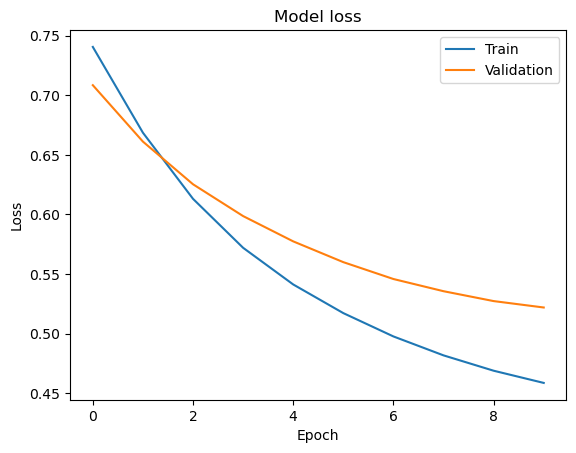

In [ ]:
##Plot the Training and Validation Loss

# Import the required plotting library
import matplotlib.pyplot as plt

# Plot training and validation loss from the model history
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')

# Set the title and labels of the plot
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Add a legend to differentiate between training and validation
plt.legend(['Train', 'Validation'], loc='upper right')

# Display the plot
plt.show()
